In [41]:
import sys
import copy 
import time

# Defining 8 puzzle
- The problem contains 9 cells stored in a grid. Can be represented as a string of 9 characters.
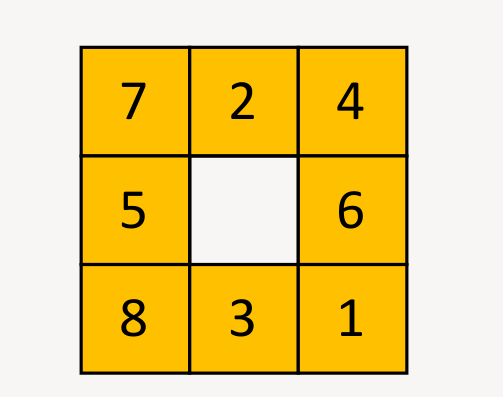
Can be represented as 7245_6831

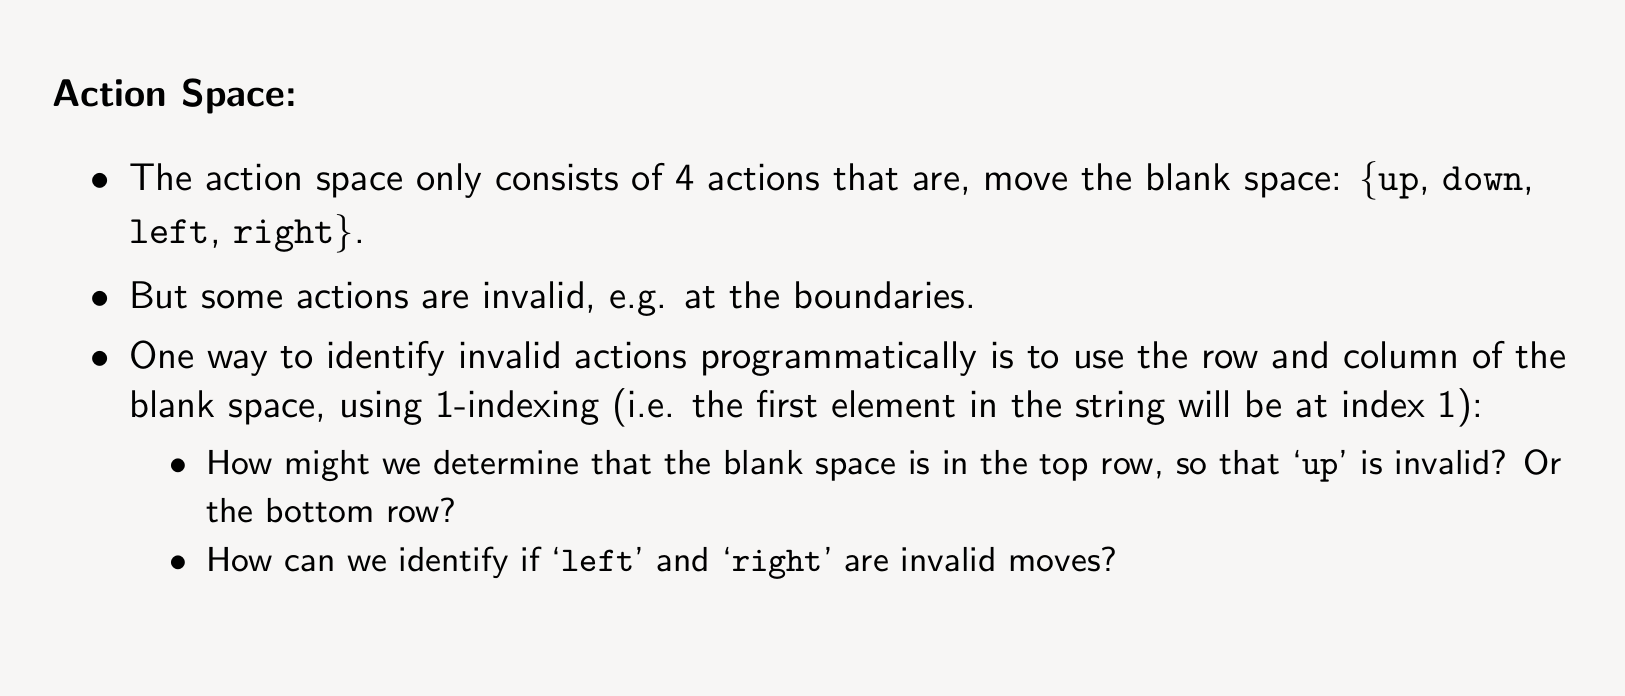

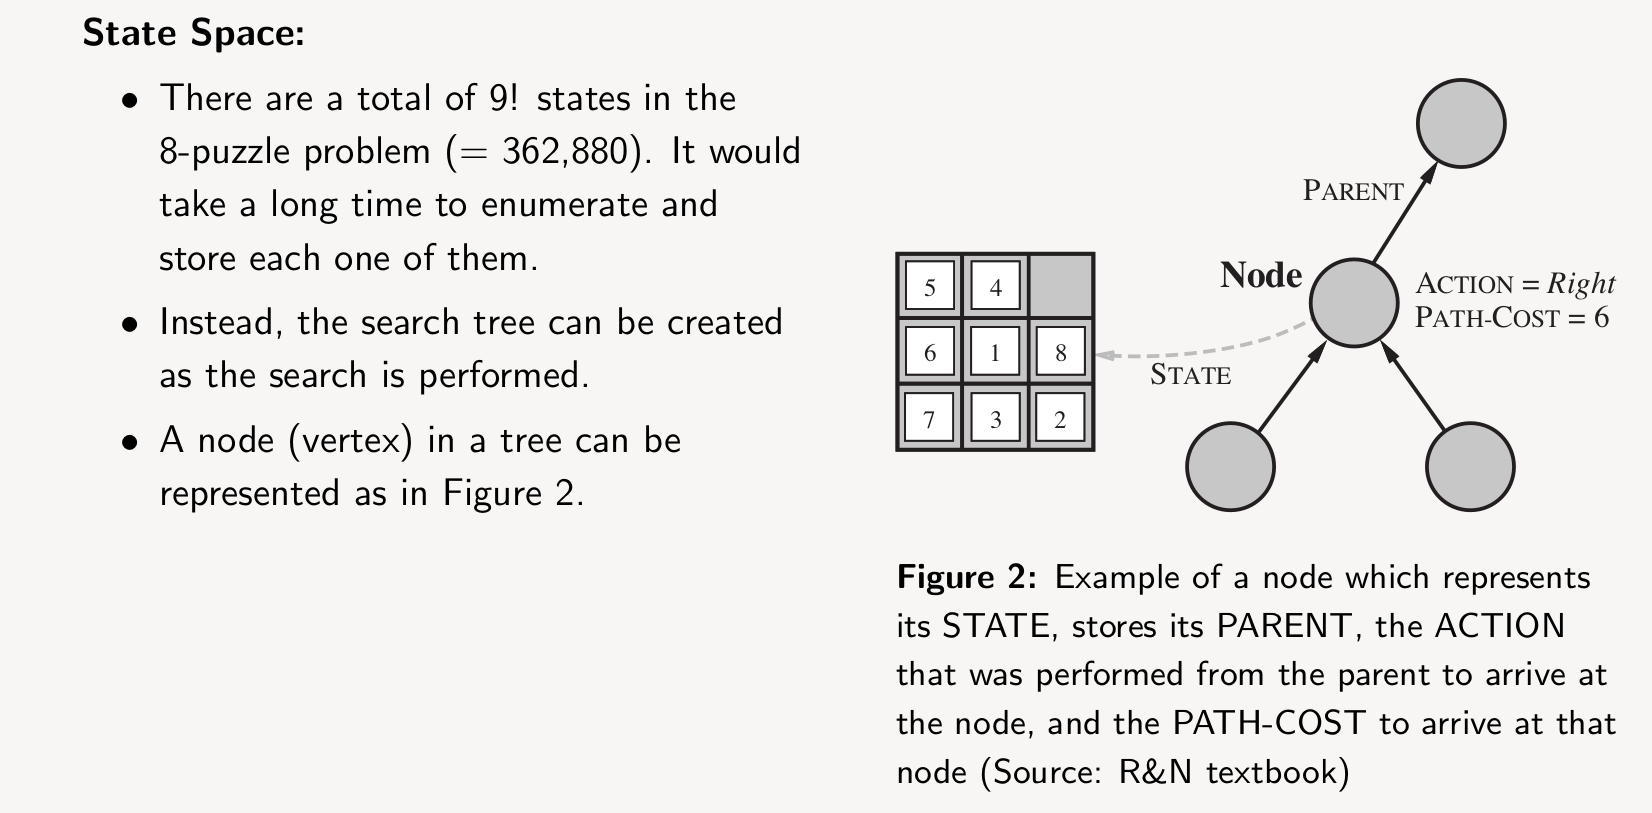

In [42]:
LEFT = 0
RIGHT = 1
UP = 2
DOWN = 3


class EightPuzzle:

    def __init__(self, squares):
        self.squares = tuple(squares) # game state 

        idx = -1
        for i in range(len(self.squares)):
            if self.squares[i] == '_':
                idx = i # position of '_'
        self.idx = idx

    def __eq__(self, obj): # comparing two states 
        if obj is None:
            return False
        return self.squares == obj.squares

    def __hash__(self):
        return hash(self.squares)

    def move_left(self): 
        new_squares = list(self.squares)
        new_squares[self.idx] = self.squares[self.idx-1]
        new_squares[self.idx-1] = self.squares[self.idx]
        return EightPuzzle(new_squares)

    def move_right(self):
        new_squares = list(self.squares)
        new_squares[self.idx] = self.squares[self.idx+1]
        new_squares[self.idx+1] = self.squares[self.idx]
        return EightPuzzle(new_squares)

    def move_up(self):
        new_squares = list(self.squares)
        new_squares[self.idx] = self.squares[self.idx-3]
        new_squares[self.idx-3] = self.squares[self.idx]
        return EightPuzzle(new_squares)

    def move_down(self):
        new_squares = list(self.squares)
        new_squares[self.idx] = self.squares[self.idx+3]
        new_squares[self.idx+3] = self.squares[self.idx]
        return EightPuzzle(new_squares)

    def get_successors(self):
        successors = [] # returns a list of all possible state sucessors

        if self.idx % 3 > 0:
            successors.append(self.move_left())
        else:
            successors.append(None)

        if self.idx % 3 < 2:
            successors.append(self.move_right())
        else:
            successors.append(None)

        if self.idx // 3 > 0:
            successors.append(self.move_up())
        else:
            successors.append(None)

        if self.idx // 3 < 2:
            successors.append(self.move_down())
        else:
            successors.append(None)

        return successors

    def num_inversions(self):
        total = 0 # numebr of inversions possible
        for i in range(len(self.squares)):
            if self.squares[i] == '_': # skip the '_'
                continue
            si = int(self.squares[i])
            for j in range(i, len(self.squares)):
                if self.squares[j] == '_': # skip the  '_'
                    continue
                sj = int(self.squares[j])
                if si > sj:
                    total += 1
        return total

    def get_parity(self):
        return self.num_inversions() % 2

    def __str__(self):
        s = ""
        for c in self.squares:
            s += c
        return s

In [34]:
1%2

1

# BFS
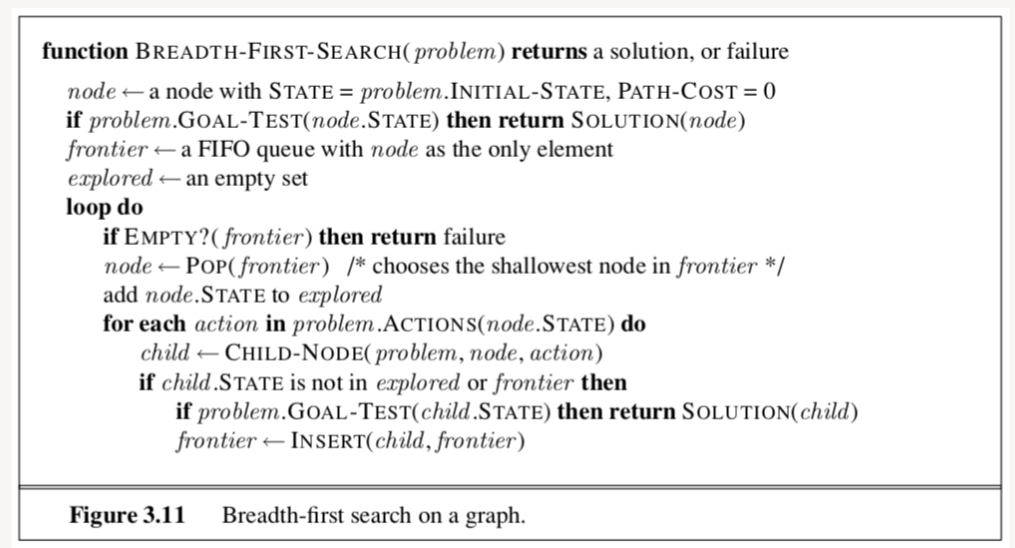

- In BFS, the sucessors of a node get added to a FIFO (First In First Out) queue.
- Implemeted as container class (see container.append(next_node), container.pop())
- The sucessors will be the neighbours of the current state. -> For each state there are max 4 neighbours.
- 1348627_5 would be the first state to get constructed and added to the queue:
    1. We check if it is the goal node
    2. It gets marked as expanded, and then
    3. its neighbours get constructed  and added to the queue

Refer Xournal

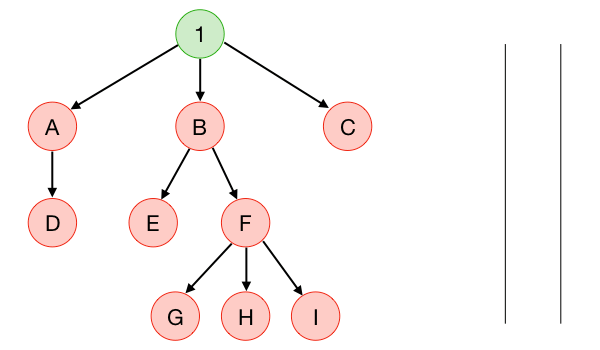

In [43]:
class ContainerEntry:
    def __init__(self, puzzle, parent, action_from_parent):
        self.puzzle = puzzle
        self.parent = parent
        self.action_from_parent = action_from_parent

    def get_successors(self):
        s = []
        suc = self.puzzle.get_successors()

        if suc[0] is not None:
            s.append(ContainerEntry(suc[0], self, LEFT))
        if suc[1] is not None:
            s.append(ContainerEntry(suc[1], self, RIGHT))
        if suc[2] is not None:
            s.append(ContainerEntry(suc[2], self, UP))
        if suc[3] is not None:
            s.append(ContainerEntry(suc[3], self, DOWN))

        return s

    def __eq__(self, obj):
        return self.puzzle == obj.puzzle

In [46]:
def bfs(initial, goal):
    container = [ContainerEntry(initial, None, None)]
    visited = set([])

    i = 0
    while len(container) > 0:
        # expand node
        node = container.pop(0)
        if node.puzzle == goal:
            actions = []
            while node.action_from_parent is not None:
                actions.append(node.action_from_parent)
                node = node.parent
            return list(reversed(actions))

        # add successors
        suc = node.get_successors()
        for s in suc:
            if s.puzzle not in visited:
                container.append(s)
                visited.add(s.puzzle)
        i += 1

    return None

#### Now lets run BFS
2.2: c) 281463_75 -> 1238_4765

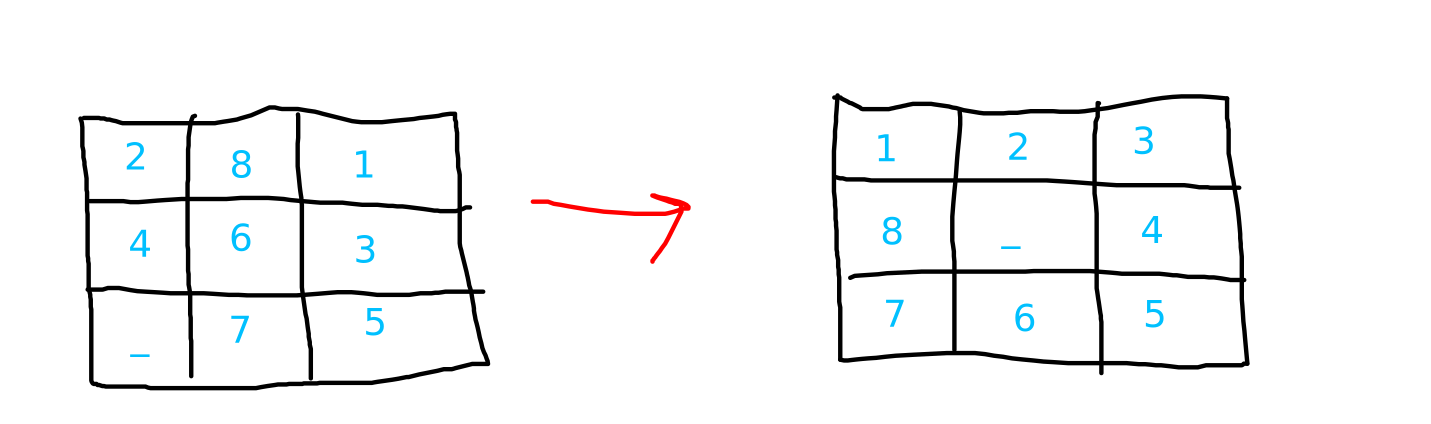

In [60]:
p1 = EightPuzzle("1348627 5")

p2 = EightPuzzle("1238 4765")
t0 = time.time()
for _ in range(50):
    actions_bfs = bfs(p1, p2)
t_bfs = (time.time() - t0) / 50
num_actions_bfs = len(actions_bfs)


TypeError: object of type 'NoneType' has no len()

In [50]:
len(visited_bfs)

2043

In [59]:
len(actions_bfs)

12

In [52]:
t_bfs

0.01611539363861084

# DFS

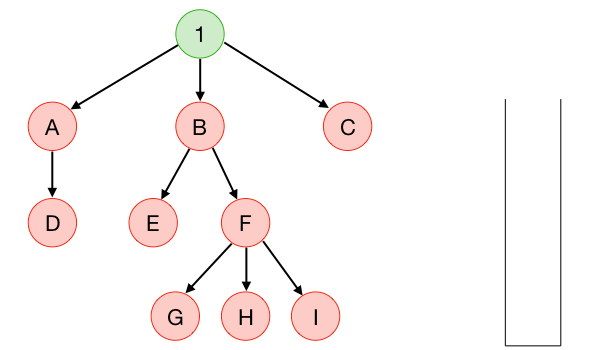

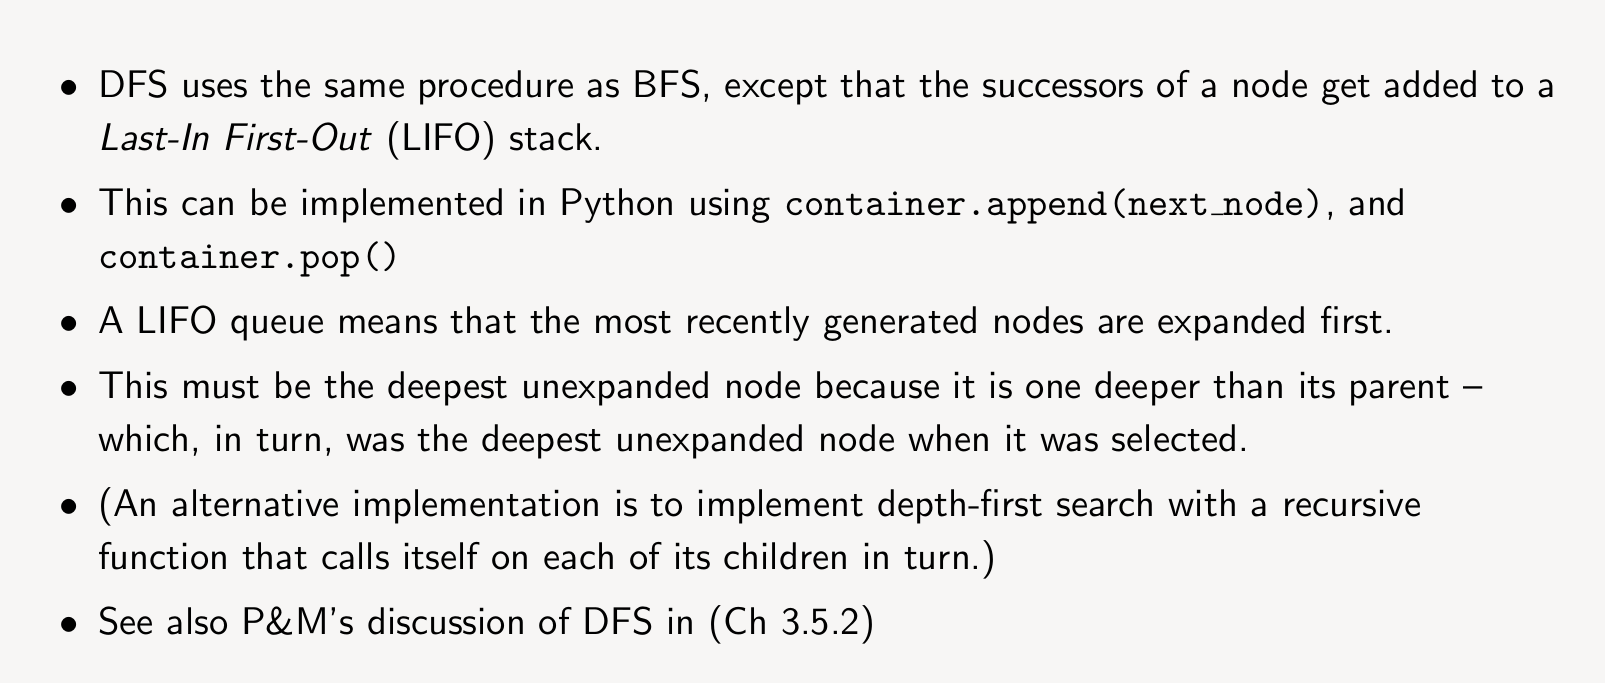

In [53]:
def dfs(initial, goal):
    container = [ContainerEntry(initial, None, None)]
    visited = set([])
    
    i = 0
    while len(container) >0:
        #expand node
        node = container.pop(-1)
        if node.puzzle == goal:
            actions = []
            while node.action_from_parent is not None:
                actions.append(node.action_from_parent)
                node = node.parent
            return list(reversed(actions)), visited
        
        # add successors
        suc = node.get_successors()
        for s in suc:
            if s.puzzle not in visited:
                container.append(s)
                visited.add(s.puzzle)
    return None

In [54]:
t0 = time.time()
for _ in range(1):
    actions_dfs, visited_dfs = dfs(p1, p2)
t_dfs = (time.time() - t0) / 1
num_actions_dfs = len(actions_dfs)

In [55]:
t_dfs

0.6053605079650879

In [56]:
len(visited_dfs)

50541

In [58]:
len(actions_dfs)

27962

 len(actions_dfs)

# 2.3

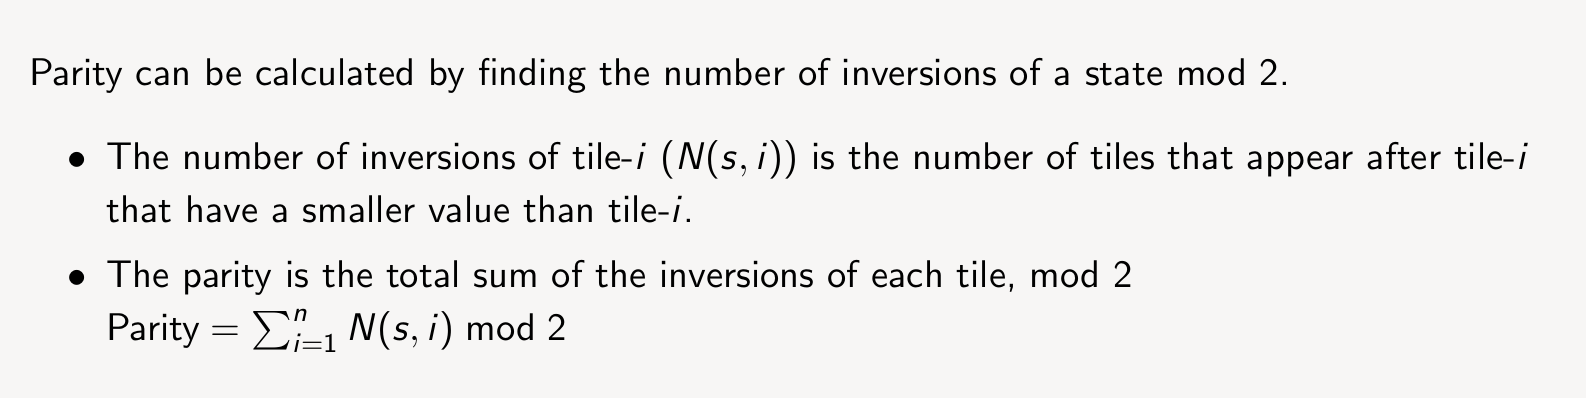

In [63]:
p1 = EightPuzzle("281463_75")
p2 = EightPuzzle("1238_4765")
if p1.get_parity() != p2.get_parity():
    print('No Solution')

In [64]:
p1.num_inversions()

11

In [65]:
p2.num_inversions()

7

In [ ]:
p1 = EightPuzzle("123456_87")
p2 = EightPuzzle("7245_6831")
if p1.get_parity() != p2.get_parity():
    print('No Solution')

In [38]:
p1 = EightPuzzle("123456_87")
p2 = EightPuzzle("12345678_")
if p1.get_parity() != p2.get_parity():
    print('No Solution')

No Solution


In [39]:
import heapq